In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [25]:
train = pd.read_excel('data.xlsx', error_bad_lines=False)
train.head(70)

,Name,Director,Total Vote,Year,IMDB score,MC Score,Genre,Unnamed: 7,Unnamed: 8
0,The Shawshank Redemption,Frank Darabont,2318407,1994,9.3,80.0,Drama,NaN,NaN
1,The Dark Knight,Christopher Nolan,2280614,2008,9.0,84.0,Action,Crime,Drama
2,Inception,Christopher Nolan,2043823,2010,8.8,74.0,Action,Adventure,Sci-Fi
3,Fight Club,David Fincher,1836556,1999,8.8,66.0,Drama,NaN,NaN
4,Pulp Fiction,Quentin Tarantino,1808737,1994,8.9,94.0,Crime,Drama,NaN
...,...,...,...,...,...,...,...,...,...
65,Gone Girl,David Fincher,849896,2014,8.1,79.0,Drama,Mystery,Thriller
66,No Country for Old Men,Ethan Coen,847206,2007,8.1,91.0,Crime,Drama,Thriller
67,A Beautiful Mind,Ron Howard,840842,2001,8.2,72.0,Biography,Drama,NaN
68,The Hunger Games,Gary Ross,839757,2012,7.2,68.0,Action,Adventure,Sci-Fi


In [26]:
print(len(train))

1000


In [27]:
train.isnull().sum().max()

278

In [28]:
train.describe()

,Total Vote,Year,IMDB score,MC Score
count,1.000000e+03,1000.000000,1000.000000,992.000000
mean,4.016538e+05,2004.020000,7.342600,66.532258
std,2.704351e+05,12.865346,0.743181,15.799608
min,1.858160e+05,1936.000000,3.800000,23.000000
25%,2.293805e+05,2000.000000,6.900000,55.000000
50%,3.070995e+05,2007.000000,7.400000,67.000000
75%,4.676580e+05,2013.000000,7.900000,79.000000
max,2.318407e+06,2020.000000,9.300000,100.000000


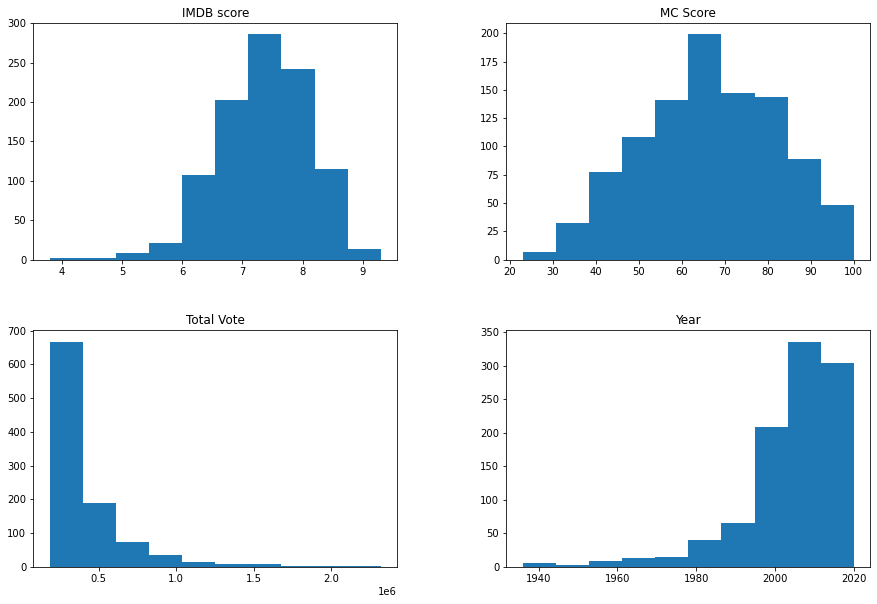

In [29]:
train.hist(bins=10,figsize=(15,10),grid= False);

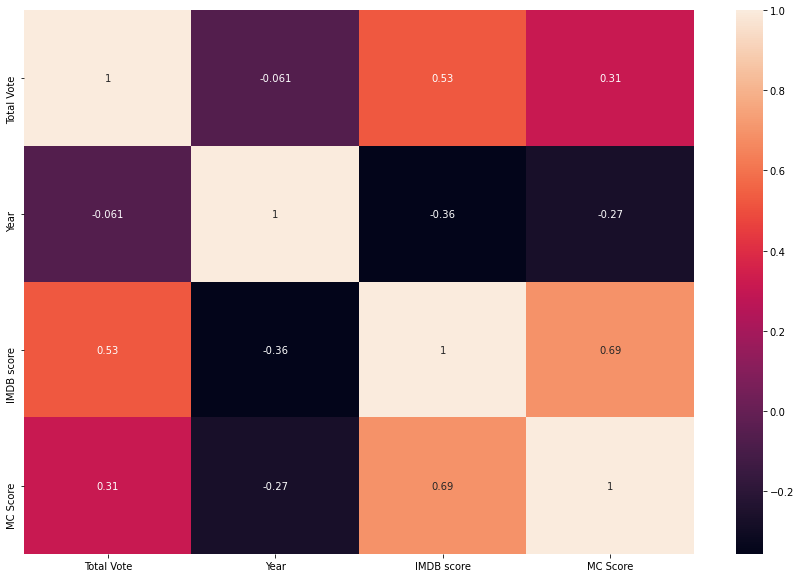

In [30]:
corr = train.corr();
plt.figure(figsize=(15,10));
ax = sns.heatmap(corr, annot=True);